# Sysmon Event Statistics

This notebook will perform a general statistical analysis of Sysmon Logs. All you need is the exported `.evtx` file, and you're good!

In [1]:
# Import dependencies
from sysmon import load_events
import plotly.express as px
import pandas as pd

In [2]:
events = load_events("examples/HuntingMetasploit.evtx")

In [3]:
# Create the DataFrame
df = pd.DataFrame([vars(e) for e in events])

## Exploratory Data Analysis

In [4]:
# Events by ID
df.groupby("event_id").count().sort_values(by="user", ascending=False)

,soup,user_id,time_created,pid,image,user,src_ip,dest_ip,src_port,dest_port,integrity_levels,command_line,parent_command_line,parent_image
event_id,,,,,,,,,,,,,,
3,738,738,738,738,738,738,738,738,738,738,738,0,0,0
13,62,62,62,62,62,62,0,0,0,0,0,0,0,0
1,32,32,32,32,32,32,0,0,0,0,32,32,32,32
12,24,24,24,24,24,24,0,0,0,0,0,0,0,0
11,2,2,2,2,2,2,0,0,0,0,0,0,0,0
22,2,2,2,2,2,2,0,0,0,0,0,0,0,0


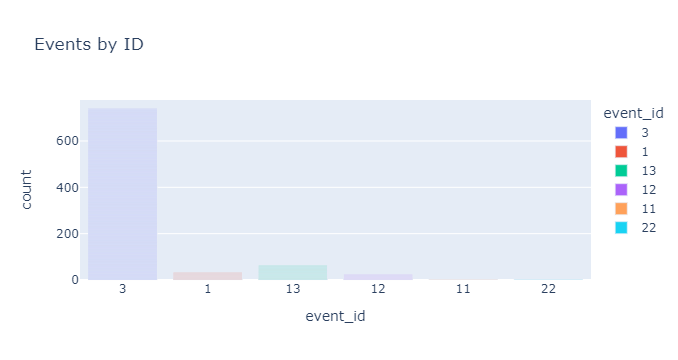

In [6]:
px.bar(df, x="event_id", color="event_id", title="Events by ID")

## Network Connection Analysis

What were the most common destination ports?

In [9]:
# Slice for just event ID 3
event_3 = df[df.event_id == "3"]

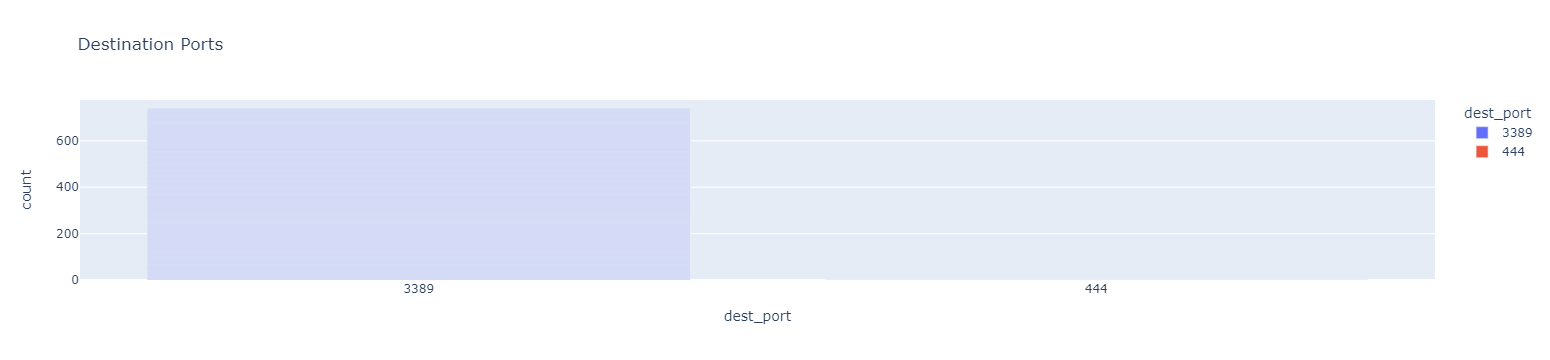

In [8]:
px.bar(event_3, x="dest_port", color="dest_port", title="Destination Ports")

What were the destinations IPs?

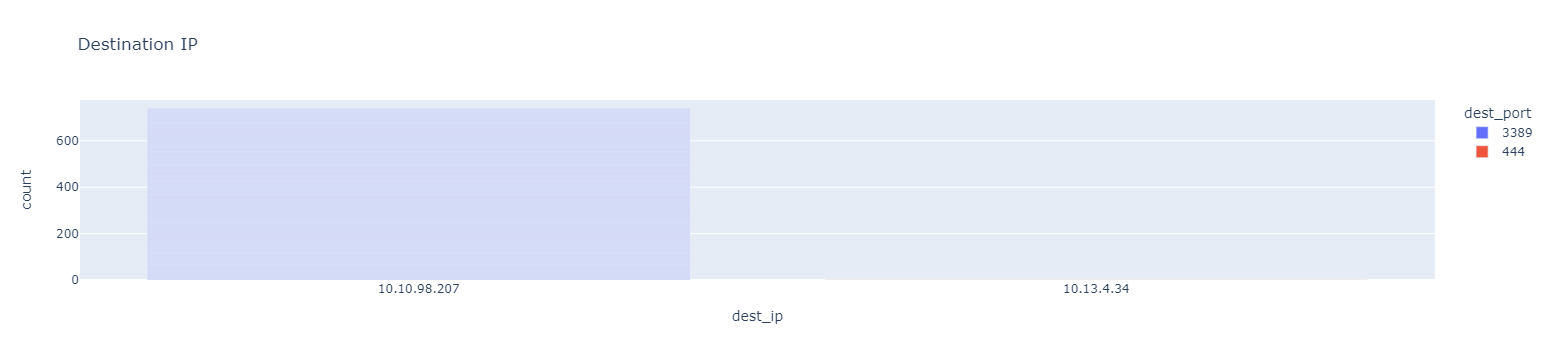

In [11]:
px.bar(event_3, x="dest_ip", color="dest_port", title="Destination IP")